In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np



In [2]:
#In order to Re-Do the sampling the perform_sampling_step needs to be set to true

In [3]:
perform_sampling_step = True


In [4]:
## Load the  dataset
data_raw = pd.read_csv('../full_dataset/Gungor_2018_VictorianAuthorAttribution_data-train.csv', encoding="latin-1")

In [5]:
#what is in the data
data_raw.head()

,text,author
0,ou have time to listen i will give you the ent...,1
1,wish for solitude he was twenty years of age a...,1
2,and the skirt blew in perfect freedom about th...,1
3,of san and the rows of shops opposite impresse...,1
4,an hour s walk was as tiresome as three in a s...,1


In [6]:
data_raw.shape

(53678, 2)

Text(0,0.5,'Value Count')

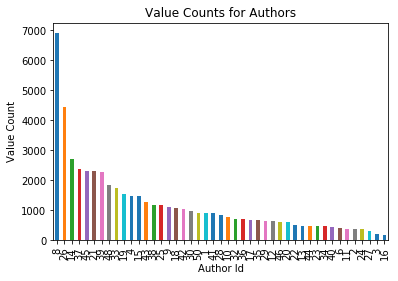

In [7]:
ax = pd.value_counts(data_raw['author'].values).plot(kind="bar", title='Value Counts for Authors')
ax.set_xlabel("Author Id")
ax.set_ylabel("Value Count")

In [8]:
data_raw['text'][0][:250]

'ou have time to listen i will give you the entire story he said it may form the basis of a future novel and prove quite as interesting as one of your own invention i had the time to listen of course one has time for anything and everything agreeable '

In [9]:
#this is a 50 class classification problem to make it possible to work on a subset of the data
#I am removing all but the top 12 authors


#df.drop(df[df.author == 8].index, inplace=True)
#df_main = df.nlargest(30000, 'count')
#df.groupby('author').apply(pd.DataFrame.sample, frac=0.5).reset_index(drop=True)

In [10]:
def performSampling(d_raw):
    
    df = d_raw.copy()
    df['count'] = df.groupby('author').transform('count')

    temp = df.groupby(['author']).size().reset_index(name='count')

    main_authors = temp.nlargest(12, 'count')
    main_authors.sort_values(by=['count'])
    top = main_authors.nlargest(12, 'count')
    samples = top['author'].values.tolist()
    
    df_sample = df[df.author.isin(samples)]
    df_train=df_sample.sample(frac=0.8,random_state=200)
    df_test=df_sample.drop(df_train.index)
    
    print("Number of Unique Authors in raw data")
    print(d_raw['author'].nunique())
    print("Number of Records in raw data")
    print(d_raw.shape)
    print("Number of Unique Authors in sample")
    print(df_sample['author'].nunique())
    print("Size of Sample")
    print(df_sample.shape)
    print("Size of Test")
    print(df_test.shape)
    print("Size of Train")
    print(df_train.shape)
    
    file_name = '../temp/victorian_author_sample_main_authors_train1.csv'
    test_file_name = '../temp/victorian_author_sample_main_authors_test1.csv'
    df_train.to_csv(file_name, encoding='utf-8', index=False)
    df_test.to_csv(test_file_name, encoding='utf-8', index=False)
    
    data = pd.read_csv(file_name, encoding="utf-8")
    
    ax = pd.value_counts(df_train['author'].values).plot(kind="bar", title='Value Counts for Authors')
    ax.set_xlabel("Author Id")
    ax.set_ylabel("Value Count")
    
    print("Values in test set")
    print(pd.value_counts(df_test['author'].values))
    
    



    

Number of Unique Authors in raw data
45
Number of Records in raw data
(53678, 2)
Number of Unique Authors in sample
12
Size of Sample
(31376, 3)
Size of Test
(6275, 3)
Size of Train
(25101, 3)
Values in test set
8     1360
26     838
14     538
37     497
21     491
45     466
39     453
48     381
33     354
19     314
4      310
15     273
dtype: int64


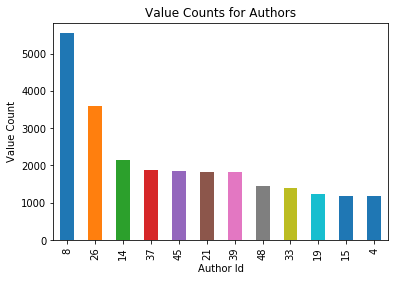

In [11]:
if (perform_sampling_step == True) :
    performSampling(data_raw)